In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 正則化を与えるアルゴリズム

[0.04227773 0.05195033 0.10801731 0.25924329 0.27392929 0.28799734
 0.43377333 0.45514956 0.54126207 0.54828103 0.55183794 0.73880371
 0.83385875 0.83656419 0.93886077 0.95864204 1.03855863 1.08680691
 1.09591418 1.15988972]


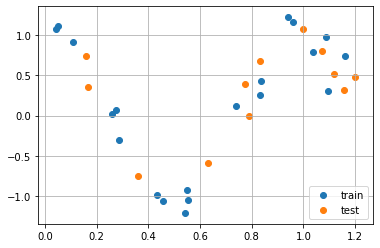

In [3]:
# データを用意する
# cos(x)に対して誤差を与えるようにデータを用意する
train_size = 20
test_size = 12
train_X = np.random.uniform(low=0, high=1.2, size=train_size)
test_X = np.random.uniform(low=0.1, high=1.3, size=test_size)
print(np.sort(train_X))
train_y = np.cos(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.cos(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)
plt.scatter(train_X, train_y, label="train")
plt.scatter(test_X, test_y, label="test")
plt.legend(loc='lower right')
plt.grid()
plt.show() 

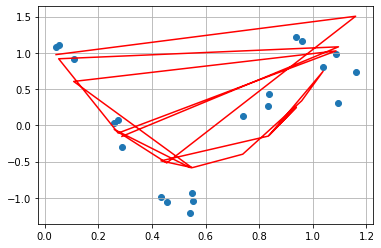

In [23]:
x_latent = np.linspace(min(train_X), max(train_X), 20)
fitted_curve = np.poly1d(np.polyfit(train_X, train_y, 2))(train_X)
plt.scatter(train_X, train_y)
plt.plot(train_X, fitted_curve, c="red", label="fitted")
plt.grid()
plt.show() 

In [5]:
# cos(x)をRidge回帰でモデル化する
poly = PolynomialFeatures(6) # 次数は6
train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))

model = Ridge(alpha=1.0)
model.fit(train_poly_X, train_y)
train_pred_y = model.predict(train_poly_X)
test_pred_y = model.predict(test_poly_X)

print(mean_squared_error(train_pred_y, train_y))
print(mean_squared_error(test_pred_y, test_y))

0.47150058910116766
0.3207388378251666
